In [1]:
import torch
import torchvision
from torchvision import datasets,transforms

In [38]:
#from torch.utils.tensorboard import SummaryWriter

In [36]:
torch.__version__

'1.2.0'

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((.5, .5, .5), (.5, .5, .5))
])

In [4]:
trainset = datasets.CIFAR10('../data/', train=True, transform=transform)

In [5]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

In [6]:
testset = torchvision.datasets.CIFAR10(root='../data/', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified


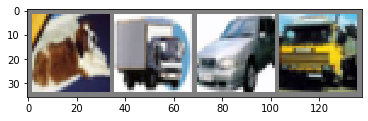

  dog truck   car truck


In [7]:

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [28]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()


In [30]:
images.shape, labels.shape

(torch.Size([4, 3, 32, 32]), torch.Size([4]))

In [8]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [10]:
import torch.backends.cudnn as cudnn


In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [12]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [16]:
net.cuda()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [19]:
net.train()
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()
        #input_var = torch.autograd.Variable(inputs)
        #label_var = torch.autograd.Variable(labels)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.221
[1,  4000] loss: 1.185
[1,  6000] loss: 1.204
[1,  8000] loss: 1.210
[1, 10000] loss: 1.182
[1, 12000] loss: 1.170
[2,  2000] loss: 1.113
[2,  4000] loss: 1.109
[2,  6000] loss: 1.106
[2,  8000] loss: 1.093
[2, 10000] loss: 1.112
[2, 12000] loss: 1.099
[3,  2000] loss: 1.025
[3,  4000] loss: 1.048
[3,  6000] loss: 1.016
[3,  8000] loss: 1.066
[3, 10000] loss: 1.027
[3, 12000] loss: 1.044
[4,  2000] loss: 0.928
[4,  4000] loss: 0.975
[4,  6000] loss: 0.992
[4,  8000] loss: 0.994
[4, 10000] loss: 0.982
[4, 12000] loss: 0.992
[5,  2000] loss: 0.901
[5,  4000] loss: 0.910
[5,  6000] loss: 0.933
[5,  8000] loss: 0.970
[5, 10000] loss: 0.938
[5, 12000] loss: 0.950
Finished Training


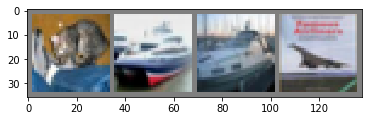

GroundTruth:    cat  ship  ship plane


In [20]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [25]:
outputs = net(images.cuda())
_, predicted = torch.max(outputs, 1)


In [26]:
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car plane plane


In [27]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 66 %
Accuracy of   car : 81 %
Accuracy of  bird : 45 %
Accuracy of   cat : 44 %
Accuracy of  deer : 66 %
Accuracy of   dog : 51 %
Accuracy of  frog : 76 %
Accuracy of horse : 57 %
Accuracy of  ship : 70 %
Accuracy of truck : 68 %
